### Segment 1: Stocks participated in the Jan 2021 rally -- GameStop, AMC, Bed Bath and Beyond, KOSS, NOKIA, BlackBerry, Robinhood

### Segment 2: Stocks which showed significant change during the Covid Pandemic eg: Zoom, Cisco, DocuSign, Clorox, Uber, Walmart, Costco, Walt Disney, Pfizer, Johnson and Johnson, Moderna

### Segment 3: Large cap Stocks with stable growth. eg: P&G, Walmart, Pfizer, Apple, Alphabet, Microsoft, Tesla, Nvidia, Starbucks, United Health

In [1]:
import os
import re
import time
import csv
import json
import random
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# CISCO

In [77]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CSCO&outputsize=full&apikey=WXZ7PHNOASSK8N3N&datatype=csv'

with requests.Session() as s:
    download = s.get(url)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

np.savetxt("Cisco.csv", decoded_content.splitlines(), delimiter =',', fmt ='% s')

In [78]:
df_Cisco = pd.read_csv("/Users/mounica/Cisco.csv")
df_Cisco.head()

,timestamp,open,high,low,close,volume
0,2022-02-18,55.4600,57.69,55.380,57.21,35626154
1,2022-02-17,55.5000,57.06,55.400,55.77,32884672
2,2022-02-16,54.1300,54.44,53.385,54.25,20388673
3,2022-02-15,53.7159,54.30,53.640,54.27,17680363
4,2022-02-14,53.4100,53.65,52.700,53.18,21868416


In [79]:
df_Cisco['Date'] = pd.to_datetime(df_Cisco['timestamp'])
df_Cisco.head()

,timestamp,open,high,low,close,volume,Date
0,2022-02-18,55.4600,57.69,55.380,57.21,35626154,2022-02-18
1,2022-02-17,55.5000,57.06,55.400,55.77,32884672,2022-02-17
2,2022-02-16,54.1300,54.44,53.385,54.25,20388673,2022-02-16
3,2022-02-15,53.7159,54.30,53.640,54.27,17680363,2022-02-15
4,2022-02-14,53.4100,53.65,52.700,53.18,21868416,2022-02-14


# MOVING AVERAGES

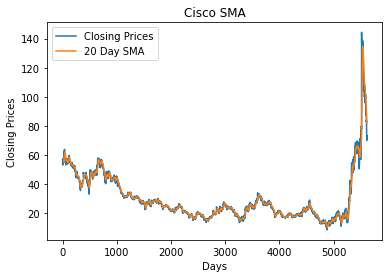

In [80]:
df_Cisco.index = np.arange(df_Cisco.shape[0])
closing_prices = df_Cisco['close']


sma = closing_prices.rolling(20).mean()
df_Cisco.head()

# Plot the data
plt.title('Cisco' + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(sma, label='20 Day SMA')
plt.legend()
plt.show()

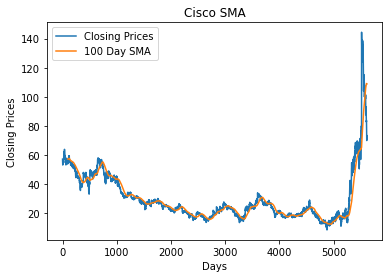

In [81]:
df_Cisco.index = np.arange(df_Cisco.shape[0])
closing_prices = df_Cisco['close']


sma = closing_prices.rolling(100).mean()
df_Cisco.head()

# Plot the data
plt.title('Cisco' + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(sma, label='100 Day SMA')
plt.legend()
plt.show()

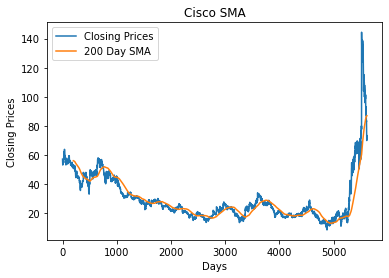

In [82]:
df_Cisco.index = np.arange(df_Cisco.shape[0])
closing_prices = df_Cisco['close']


sma = closing_prices.rolling(200).mean()
df_Cisco.head()

# Plot the data
plt.title('Cisco' + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(sma, label='200 Day SMA')
plt.legend()
plt.show()

# BOLLINGER BANDS

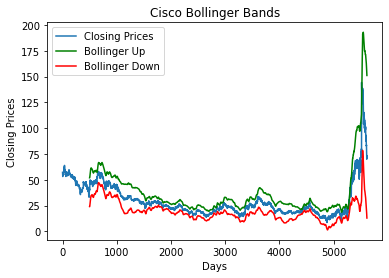

In [83]:


def get_bollinger_bands(prices, rate=500):
    sma = closing_prices.rolling(20).mean()
    std = prices.rolling(rate).std() 
    bollinger_up = sma + std * 2 
    bollinger_down = sma - std * 2
    return bollinger_up, bollinger_down

df_Cisco.index = np.arange(df_Cisco.shape[0])
closing_prices = df_Cisco['close']

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

plt.title('Cisco' + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()

# DOCUSIGN

In [84]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=DOCU&outputsize=full&apikey=WXZ7PHNOASSK8N3N&datatype=csv'

with requests.Session() as s:
    download = s.get(url)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

np.savetxt("DocuSign.csv", decoded_content.splitlines(), delimiter =',', fmt ='% s')

In [85]:
df_DocuSign = pd.read_csv("/Users/mounica/DocuSign.csv")
df_DocuSign.head()

,timestamp,open,high,low,close,volume
0,2022-02-18,115.00,116.11,109.28,110.28,4304302
1,2022-02-17,118.61,120.61,114.19,115.00,3190559
2,2022-02-16,123.15,123.92,118.51,120.14,3459780
3,2022-02-15,123.60,125.93,121.35,125.57,1952563
4,2022-02-14,122.63,125.11,120.41,120.78,2628676


In [86]:
df_DocuSign['Date'] = pd.to_datetime(df_DocuSign['timestamp'])
df_DocuSign.head()

,timestamp,open,high,low,close,volume,Date
0,2022-02-18,115.00,116.11,109.28,110.28,4304302,2022-02-18
1,2022-02-17,118.61,120.61,114.19,115.00,3190559,2022-02-17
2,2022-02-16,123.15,123.92,118.51,120.14,3459780,2022-02-16
3,2022-02-15,123.60,125.93,121.35,125.57,1952563,2022-02-15
4,2022-02-14,122.63,125.11,120.41,120.78,2628676,2022-02-14


# MOVING AVERAGES

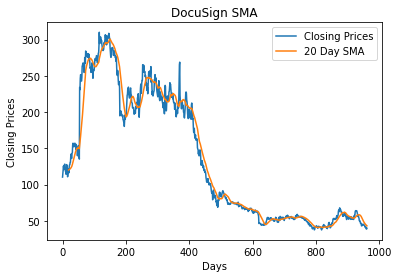

In [87]:
df_DocuSign.index = np.arange(df_DocuSign.shape[0])
DS_closing_prices = df_DocuSign['close']


sma = DS_closing_prices.rolling(20).mean()
df_DocuSign.head()

# Plot the data
plt.title('DocuSign' + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(DS_closing_prices, label='Closing Prices')
plt.plot(sma, label='20 Day SMA')
plt.legend()
plt.show()

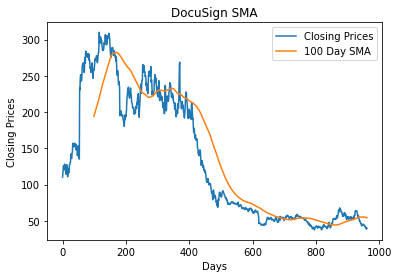

In [88]:
df_DocuSign.index = np.arange(df_DocuSign.shape[0])
DS_closing_prices = df_DocuSign['close']


sma = DS_closing_prices.rolling(100).mean()
df_DocuSign.head()

# Plot the data
plt.title('DocuSign' + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(DS_closing_prices, label='Closing Prices')
plt.plot(sma, label='100 Day SMA')
plt.legend()
plt.show()

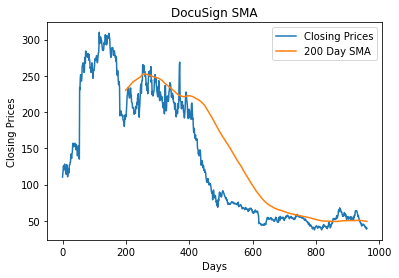

In [89]:
df_DocuSign.index = np.arange(df_DocuSign.shape[0])
DS_closing_prices = df_DocuSign['close']


sma = DS_closing_prices.rolling(200).mean()
df_DocuSign.head()

# Plot the data
plt.title('DocuSign' + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(DS_closing_prices, label='Closing Prices')
plt.plot(sma, label='200 Day SMA')
plt.legend()
plt.show()

# BOLLINGER BANDS

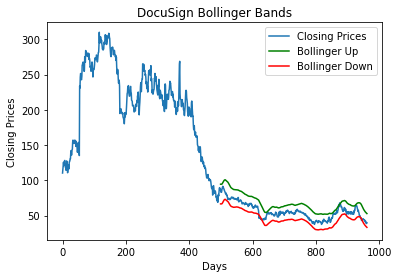

In [90]:
def get_bollinger_bands(prices, rate=500):
    sma = DS_closing_prices.rolling(20).mean()
    std = prices.rolling(rate).std() 
    bollinger_up = sma + std * 2 
    bollinger_down = sma - std * 2
    return bollinger_up, bollinger_down

df_DocuSign.index = np.arange(df_DocuSign.shape[0])
DS_closing_prices = df_DocuSign['close']

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

plt.title('DocuSign' + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(DS_closing_prices, label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()

# ZOOM

In [91]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ZM&outputsize=full&apikey=WXZ7PHNOASSK8N3N&datatype=csv'

with requests.Session() as s:
    download = s.get(url)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

np.savetxt("Zoom.csv", decoded_content.splitlines(), delimiter =',', fmt ='% s')

In [92]:
df_Zoom = pd.read_csv("/Users/mounica/Zoom.csv")
df_Zoom.head()

,timestamp,open,high,low,close,volume
0,2022-02-18,130.13,131.940,124.7100,126.96,5435014
1,2022-02-17,137.63,137.735,128.9300,129.38,4944736
2,2022-02-16,144.49,144.690,136.3950,138.51,3928926
3,2022-02-15,144.44,147.145,141.1000,146.90,3043753
4,2022-02-14,142.42,147.740,141.1101,142.09,2538889


In [93]:
df_Zoom['Date'] = pd.to_datetime(df_Zoom['timestamp'])
df_Zoom.head()

,timestamp,open,high,low,close,volume,Date
0,2022-02-18,130.13,131.940,124.7100,126.96,5435014,2022-02-18
1,2022-02-17,137.63,137.735,128.9300,129.38,4944736,2022-02-17
2,2022-02-16,144.49,144.690,136.3950,138.51,3928926,2022-02-16
3,2022-02-15,144.44,147.145,141.1000,146.90,3043753,2022-02-15
4,2022-02-14,142.42,147.740,141.1101,142.09,2538889,2022-02-14


# MOVING AVERAGES

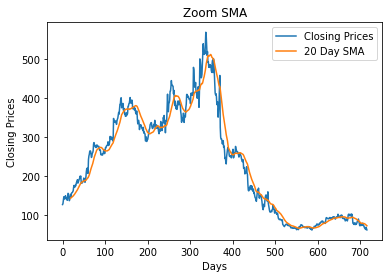

In [94]:
df_Zoom.index = np.arange(df_Zoom.shape[0])
Z_closing_prices = df_Zoom['close']


sma = Z_closing_prices.rolling(20).mean()
df_Zoom.head()

# Plot the data
plt.title('Zoom' + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(Z_closing_prices, label='Closing Prices')
plt.plot(sma, label='20 Day SMA')
plt.legend()
plt.show()

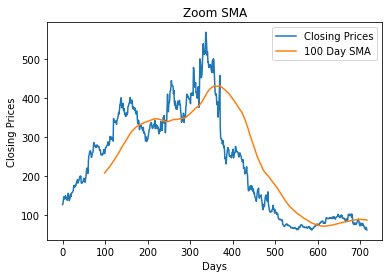

In [95]:
df_Zoom.index = np.arange(df_Zoom.shape[0])
Z_closing_prices = df_Zoom['close']


sma = Z_closing_prices.rolling(100).mean()
df_Zoom.head()

# Plot the data
plt.title('Zoom' + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(Z_closing_prices, label='Closing Prices')
plt.plot(sma, label='100 Day SMA')
plt.legend()
plt.show()

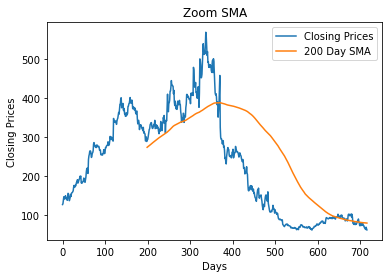

In [96]:
df_Zoom.index = np.arange(df_Zoom.shape[0])
Z_closing_prices = df_Zoom['close']


sma = Z_closing_prices.rolling(200).mean()
df_Zoom.head()

# Plot the data
plt.title('Zoom' + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(Z_closing_prices, label='Closing Prices')
plt.plot(sma, label='200 Day SMA')
plt.legend()
plt.show()

# BOLLINGER BANDS

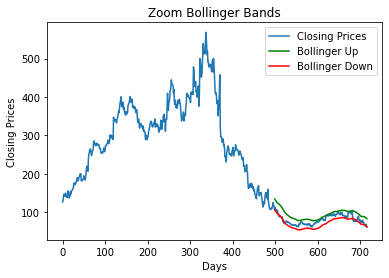

In [97]:
def get_bollinger_bands(prices, rate=500):
    sma = Z_closing_prices.rolling(20).mean()
    std = prices.rolling(rate).std() 
    bollinger_up = sma + std * 2 
    bollinger_down = sma - std * 2
    return bollinger_up, bollinger_down

df_Zoom.index = np.arange(df_Zoom.shape[0])
Z_closing_prices = df_Zoom['close']

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

plt.title('Zoom' + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(Z_closing_prices, label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()